<a href="https://colab.research.google.com/github/jobellet/uneye/blob/master/UnEye_online_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run the first cell below to install the software

In [1]:
# download U'n'Eye
!git clone https://github.com/berenslab/uneye.git

Path_to_UnEye_folder = '/content/uneye/'
# go to the uneye folder
import os
os.chdir(Path_to_UnEye_folder)

## install dependencies


# to do deep learning
# http://pytorch.org/
from os.path import exists

import numpy as np
import uneye
import scipy.io as io
import matplotlib.pyplot as plt
from google.colab import files

# to read .mat files
!pip install mat4py
import mat4py

Cloning into 'uneye'...
remote: Enumerating objects: 990, done.
remote: Total 990 (delta 0), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (990/990), 169.38 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Checking out files: 100% (489/489), done.


# Labeling on your own data




For Labeling, 3 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing), default: 1==no removal
    - min_sacc_dist: minimum distance between two saccades for merging of close-by saccades, default: 1==no merge
    - weights_name: filename for storage of trained weights. All trained weights will automatically be saved in the local folder 'training'. The default filename is 'weights'

  
Call the model with **uneye.DNN()** and then run training with the method **model.train()**

## Run the next cell to upload your data

In [7]:
os.chdir(Path_to_UnEye_folder+'/data')
os.makedirs('mydata', exist_ok=True)
os.chdir('mydata')
datapath = 'data/mydata/'
uploaded = files.upload()
os.chdir(Path_to_UnEye_folder)


Saving X.csv to X (1).csv
Saving Y.csv to Y.csv


## Run the next cell to upload your network weights

In [4]:
os.chdir(Path_to_UnEye_folder+'/training')
uploaded = files.upload()
os.chdir(Path_to_UnEye_folder)


Saving myweights to myweights


##Change the next cell so that it uses your data

In [5]:
########### YOUR DATA ############
x_filename = 'X.csv'  
y_filename = 'Y.csv'
##################################

##################################
########### Parameters ###########

min_sacc_dur = 5 #minimum saccade duration in ms
min_sacc_dist = 10 #minimum saccade distance in ms
sampfreq = 1000 #Hz
weights_name = 'myweights'


##Run the next cell to label data using your network

In [8]:
# load your data .mat or .csv

if x_filename.find('.mat')>-1:
  X = np.asarray(mat4py.loadmat(datapath+x_filename)['X'])
elif x_filename.find('.csv')>-1:
  X = np.loadtxt(datapath+x_filename,delimiter=',')

if y_filename.find('.mat')>-1:
  Y = np.asarray(mat4py.loadmat(datapath+y_filename)['Y'])
elif y_filename.find('.csv')>-1:
  Y = np.loadtxt(datapath+y_filename,delimiter=',')

# create model
model = uneye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur,
                 min_sacc_dist=min_sacc_dist,)

# Label data
L,P = model.predict(X,Y)


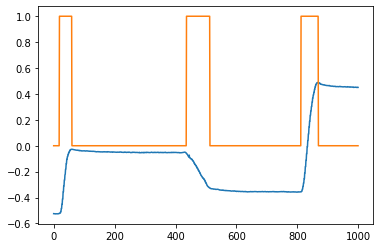

In [10]:
plt.plot(X[-1000:])
plt.plot(L[-1000:])

## Run the next cell to download the weights of the network trained on your data

In [ ]:
files.download(Path_to_UnEye_folder+'training/'+weights_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>